#YouTube trending video analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import csv

In [2]:
df=pd.read_csv("data1.csv")

In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,ZAfAud_M_mg,Halsey - Without Me,2018-10-29T15:58:23.000Z,UCm3FgJ2Hqm7tb70T-GfwXVA,HalseyVEVO,10,18.01.11,halsey without me|halsey|without me|halsey alo...,4467893,297950,6369,15626,https://i.ytimg.com/vi/ZAfAud_M_mg/default.jpg,False,False,Without Me available now: https://halsey.lnk.t...
1,YyWru2XOiK0,Tyga - Dip (Official Video) ft. Nicki Minaj,2018-10-29T19:00:49.000Z,UChXnu0HBydqedqhnClp0rJg,TygaVEVO,10,18.01.11,Tyga|Dip|(Official|Video)|Last|Kings|Music|EMP...,5318708,252922,14229,24324,https://i.ytimg.com/vi/YyWru2XOiK0/default.jpg,False,False,"Download the new single, DIP. Out Now!Stream: ..."
2,mwsJDfiOJdk,Worst Halloween Candy Taste Test (Day 2),2018-10-30T10:00:10.000Z,UC4PooiX37Pld1T8J5SYT-SQ,Good Mythical Morning,24,18.01.11,gmm|good mythical morning|rhettandlink|rhett a...,2037463,52481,1808,14696,https://i.ytimg.com/vi/mwsJDfiOJdk/default.jpg,False,False,Day 2 of the worst Halloween Candy tournament ...
3,0iy3HPxBFQY,James Corden & Ariana Grande Visit an Escape Room,2018-10-31T05:01:11.000Z,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,18.01.11,The Late Late Show|Late Late Show|James Corden...,896693,49252,289,2247,https://i.ytimg.com/vi/0iy3HPxBFQY/default.jpg,False,False,Since Ariana Grande loves Halloween and being ...
4,WZwr2a_lFWY,IZ*ONE (아이즈원) - 라비앙로즈 (La Vie en Rose) MV,2018-10-29T09:00:05.000Z,UC_pwIXKXNm5KGhdEVzmY60A,Stone Music Entertainment,10,18.01.11,K-CULTURE korean Music MV Music Video K-Pop Kp...,7777735,425685,28512,71743,https://i.ytimg.com/vi/WZwr2a_lFWY/default.jpg,False,False,IZ*ONE (아이즈원) - 라비앙로즈 (La Vie en Rose) MV 입니다....


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           84 non-null     object
 1   title              84 non-null     object
 2   publishedAt        84 non-null     object
 3   channelId          84 non-null     object
 4   channelTitle       84 non-null     object
 5   categoryId         84 non-null     int64 
 6   trending_date      84 non-null     object
 7   tags               84 non-null     object
 8   view_count         84 non-null     int64 
 9   likes              84 non-null     int64 
 10  dislikes           84 non-null     int64 
 11  comment_count      84 non-null     int64 
 12  thumbnail_link     84 non-null     object
 13  comments_disabled  84 non-null     bool  
 14  ratings_disabled   84 non-null     bool  
 15  description        84 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usage: 

In [5]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000
mean,18.583333,3.630983e+06,1.527229e+05,5534.583333,14161.500000
std,9.076925,4.949098e+06,2.731076e+05,9889.472330,23775.525622
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,10.000000,8.901528e+05,1.867925e+04,568.750000,1878.250000
50%,23.000000,1.689174e+06,5.086650e+04,1512.000000,4317.500000
75%,24.000000,4.286148e+06,1.545355e+05,5217.000000,15838.750000
max,43.000000,2.287331e+07,1.446774e+06,57885.000000,151600.000000


In [6]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
#%matplotlib notebook

In [7]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [8]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description


In [9]:
df["description"] = df["description"].fillna(value="")

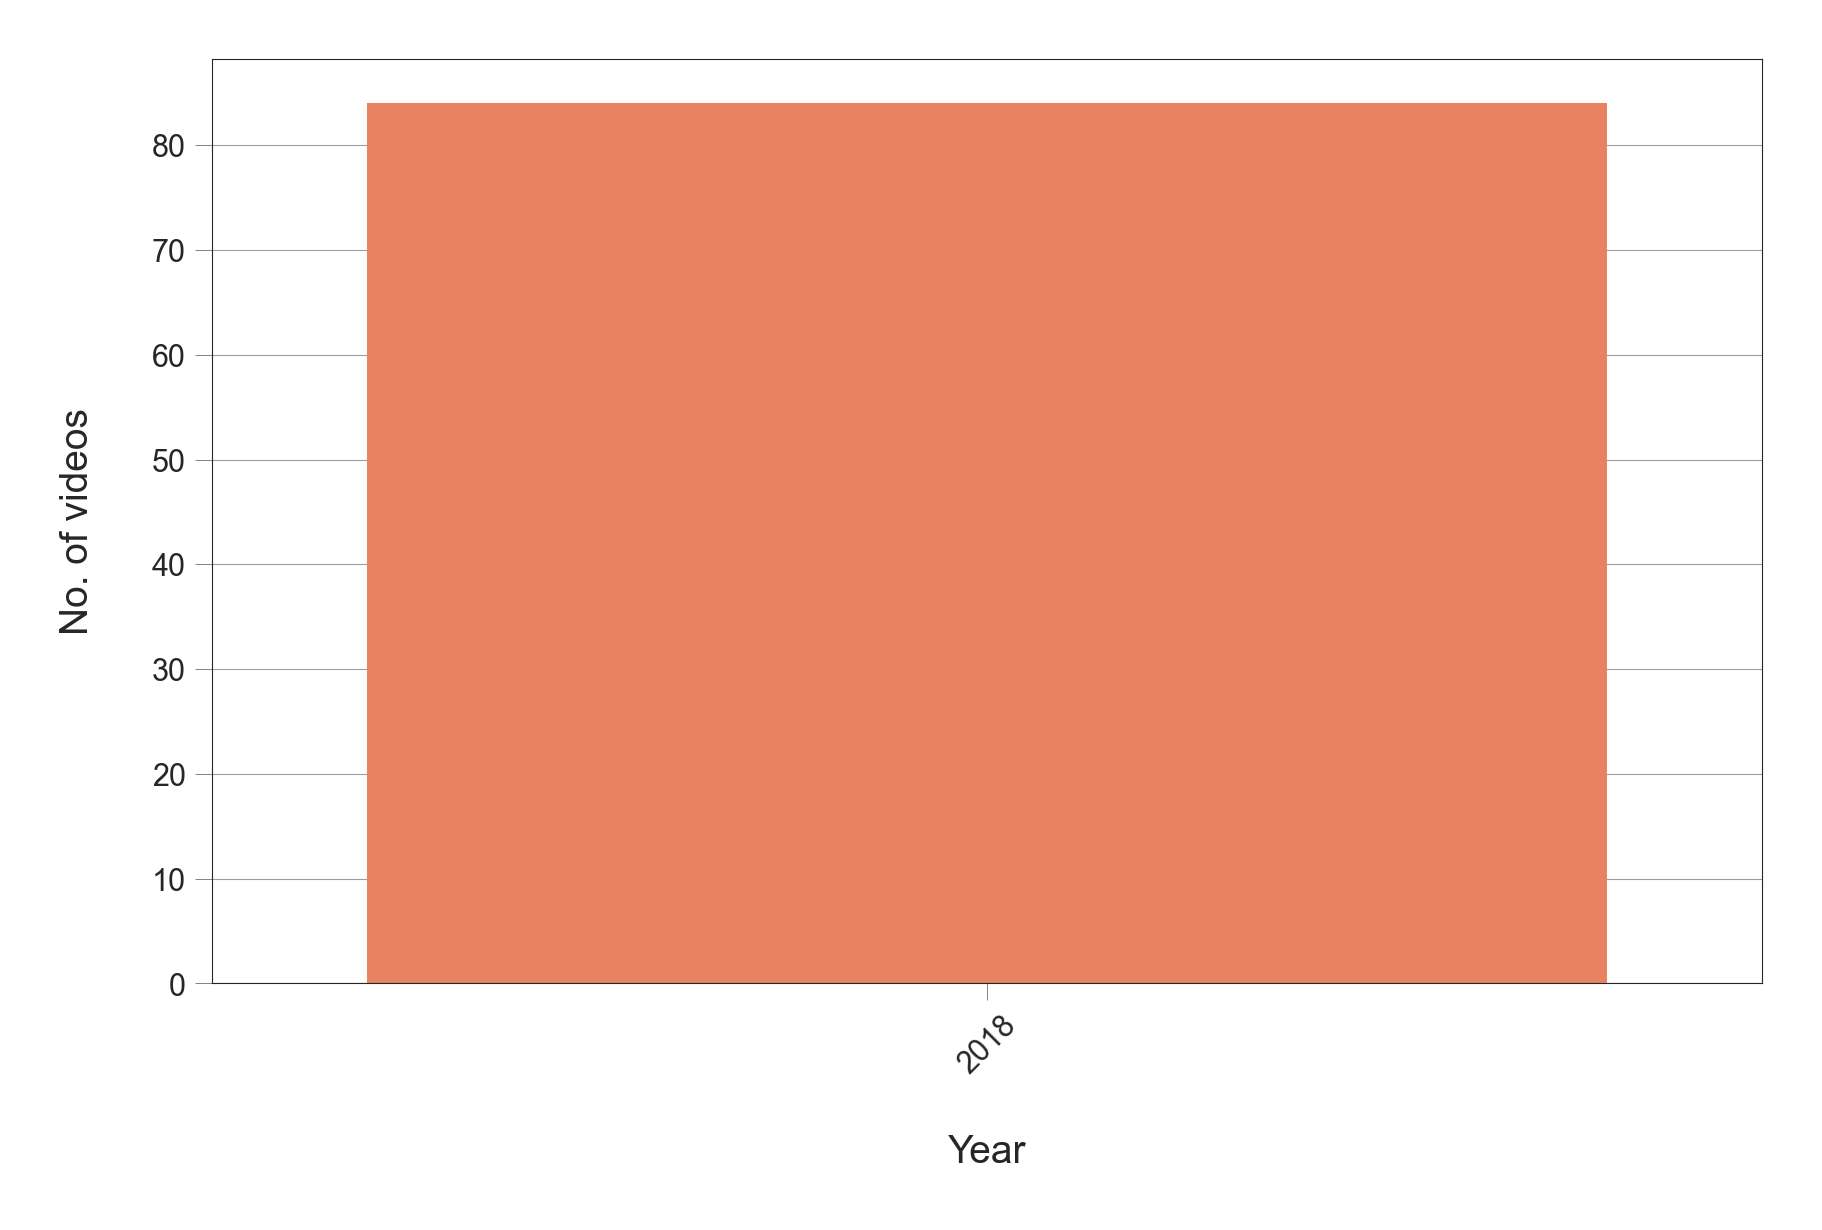

In [10]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().reset_index()
cdf.columns = ["year", "No_of_videos"]

# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size
sns.barplot(x="year", y="No_of_videos", data=cdf, 
            palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)

# Set labels for the axes
ax.set(xlabel="Year", ylabel="No. of videos")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [11]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

trending_date
2018   1.00
Name: proportion, dtype: float64

In [12]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,84.00,84.00,84.00,84.00,84.00
mean,18.58,3630983.49,152722.93,5534.58,14161.50
std,9.08,4949098.09,273107.55,9889.47,23775.53
min,1.00,0.00,0.00,0.00,0.00
25%,10.00,890152.75,18679.25,568.75,1878.25
50%,23.00,1689174.50,50866.50,1512.00,4317.50
75%,24.00,4286147.75,154535.50,5217.00,15838.75
max,43.00,22873313.00,1446774.00,57885.00,151600.00


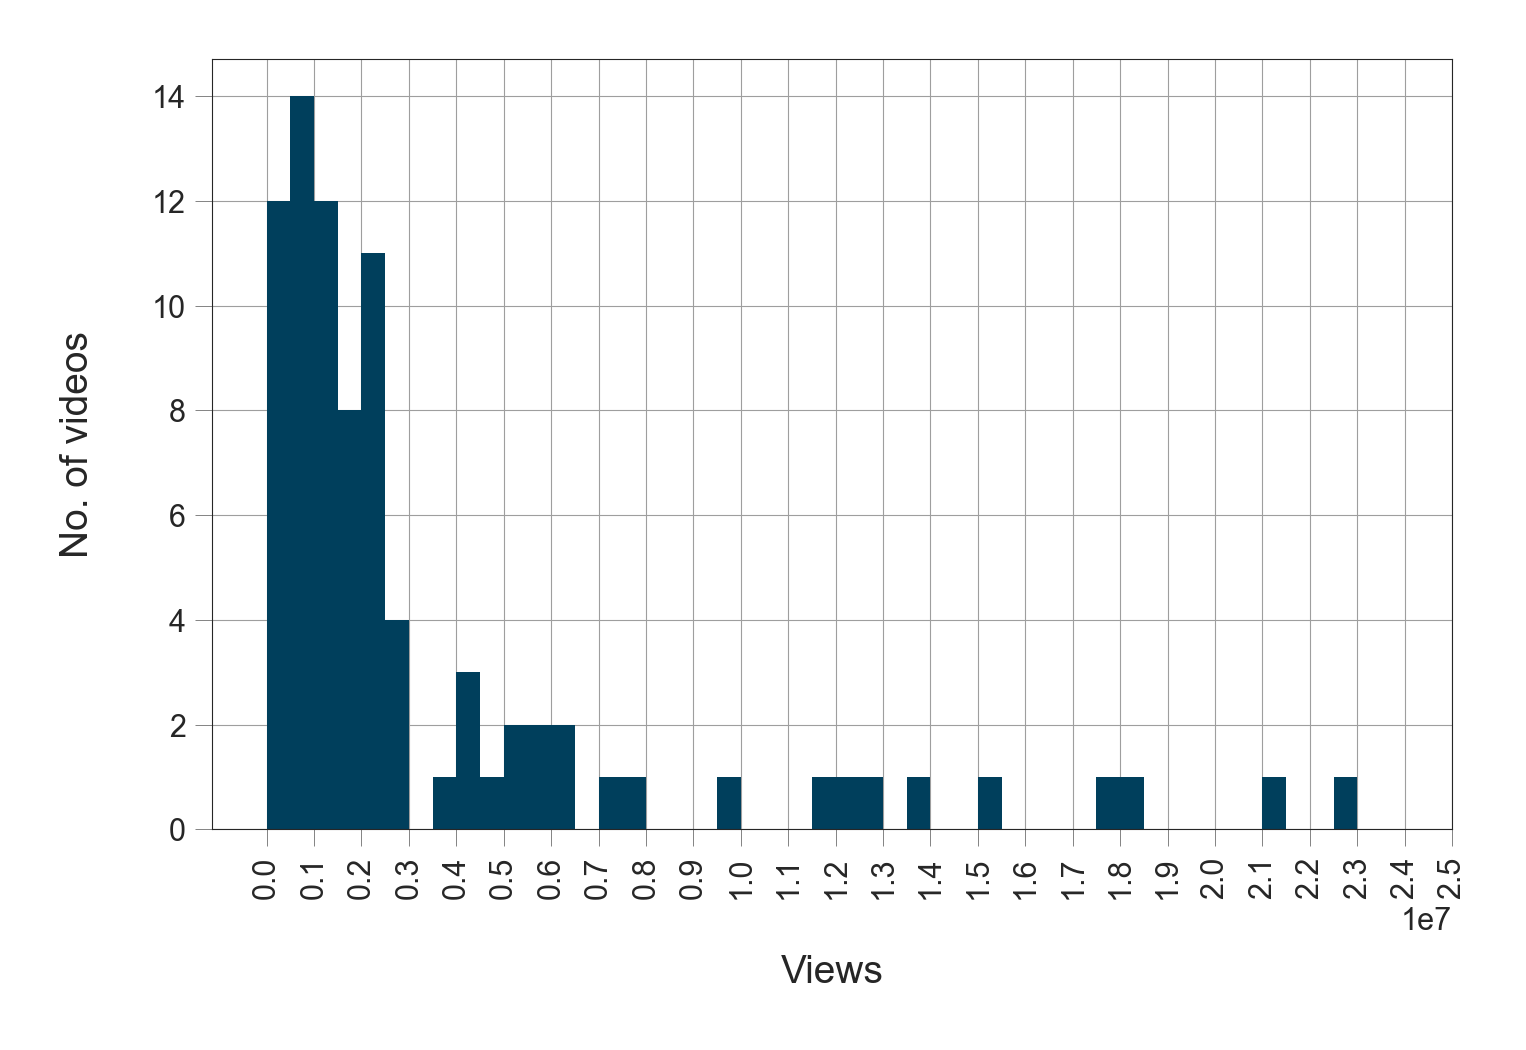

In [13]:
fig, ax = plt.subplots()
_ = sns.distplot(df["view_count"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e7, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e6))
_ = ax.set_xlim(right=2.5e7)
_ = plt.xticks(rotation=90)

In [14]:
df[df['view_count'] < 1e7]['view_count'].count() / df['view_count'].count() * 100

89.28571428571429

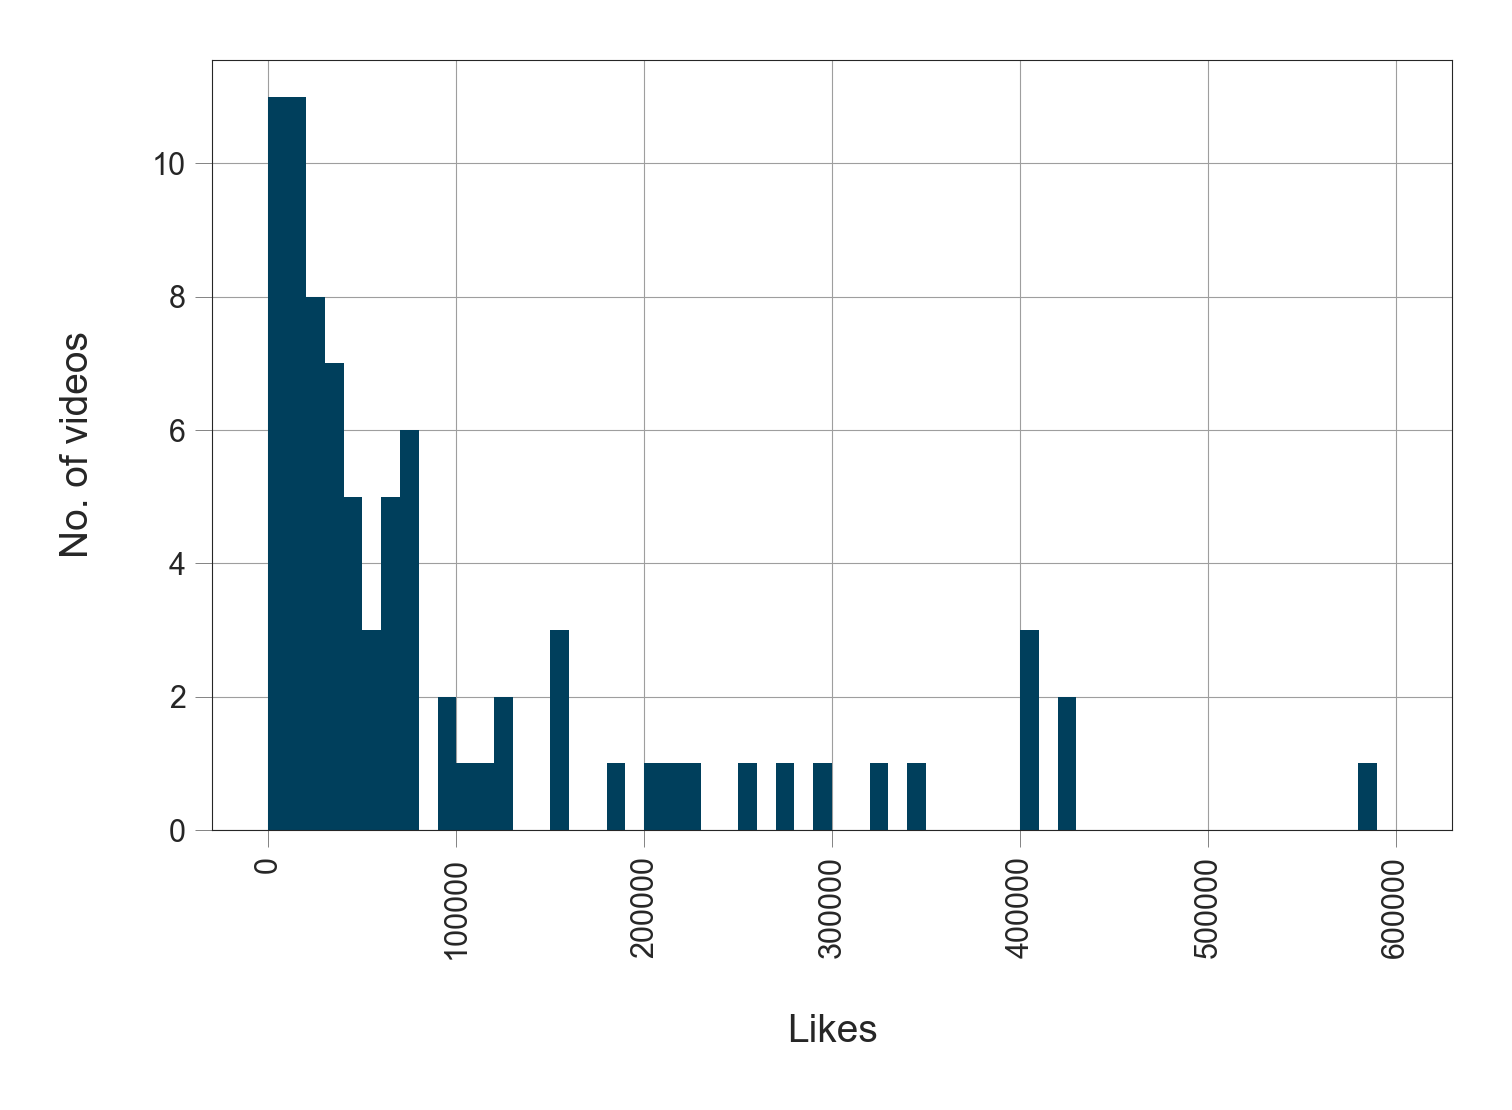

In [15]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e5, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

In [16]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

44.047619047619044

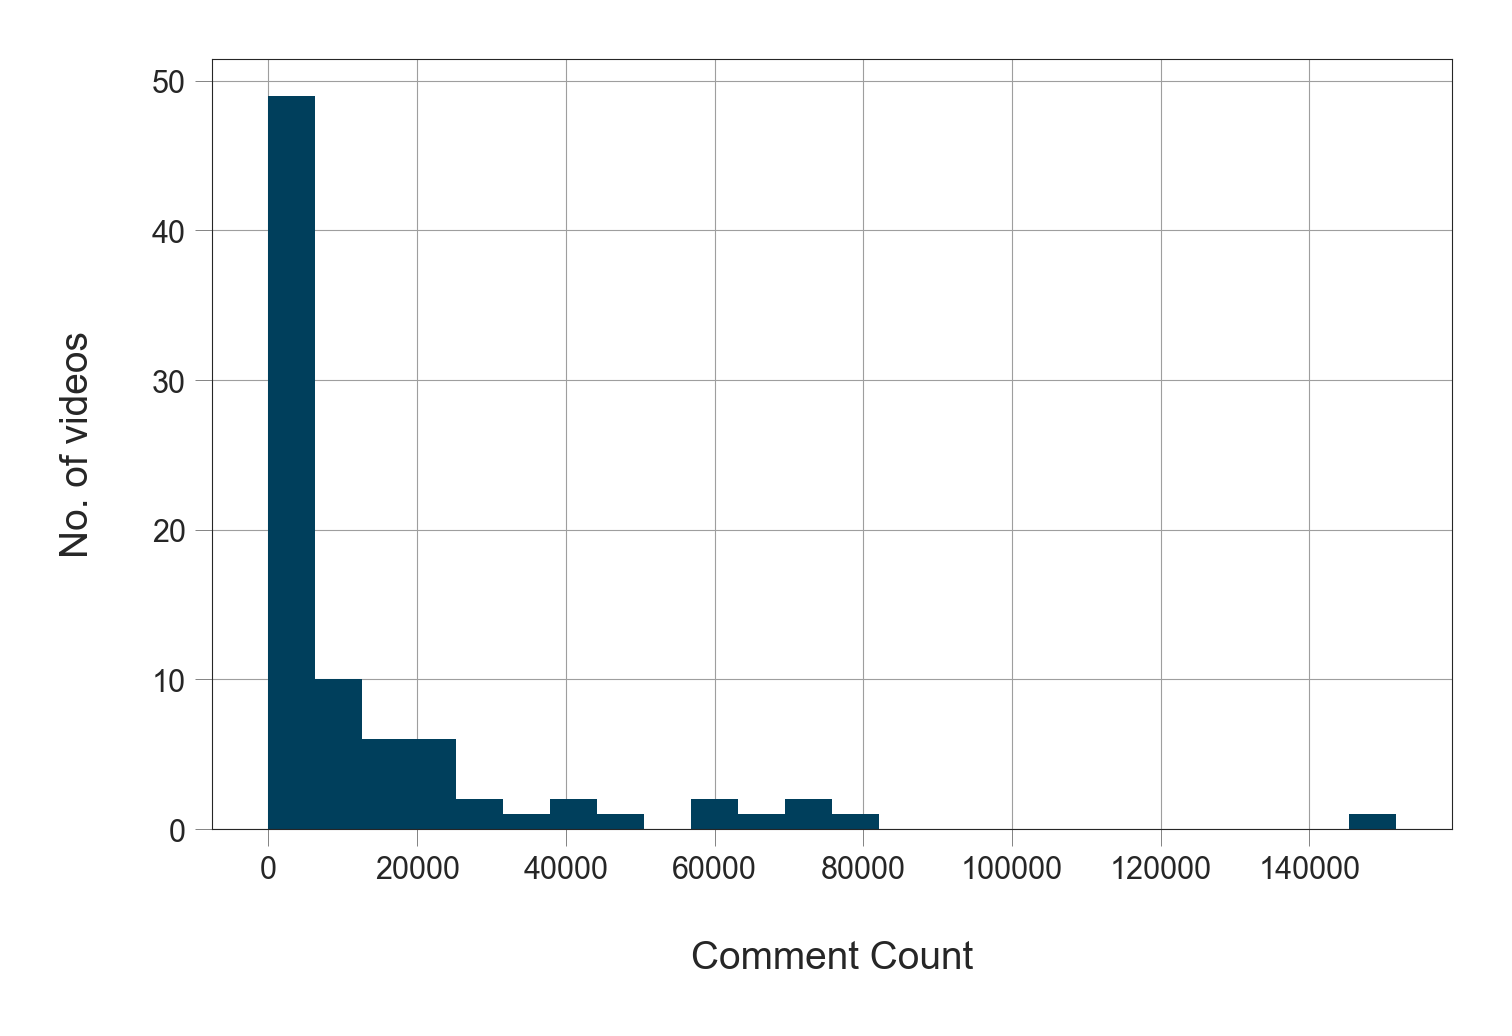

In [17]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [18]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

47.61904761904761

In [19]:
df.describe(include = ['O'])

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,thumbnail_link,description
count,84,84,84,84,84,84,84,84,84
unique,84,84,84,84,84,1,83,84,84
top,ZAfAud_M_mg,Halsey - Without Me,2018-10-29T15:58:23.000Z,UCm3FgJ2Hqm7tb70T-GfwXVA,HalseyVEVO,18.01.11,[none],https://i.ytimg.com/vi/ZAfAud_M_mg/default.jpg,Without Me available now: https://halsey.lnk.t...
freq,1,1,1,1,1,84,2,1,1


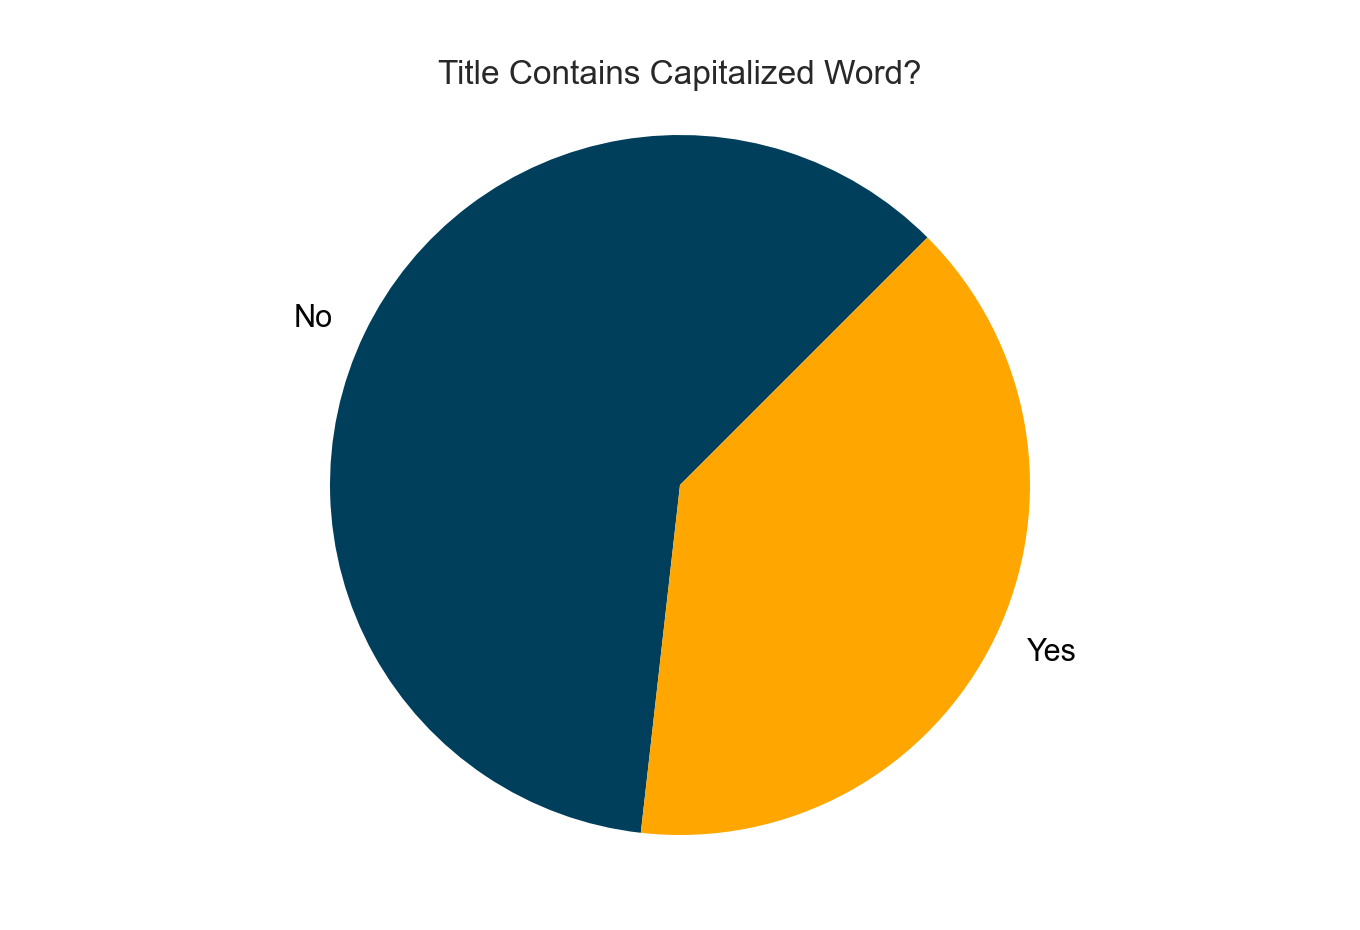

In [20]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')


In [21]:
df["contains_capitalized"].value_counts(normalize=True)


contains_capitalized
False   0.61
True    0.39
Name: proportion, dtype: float64

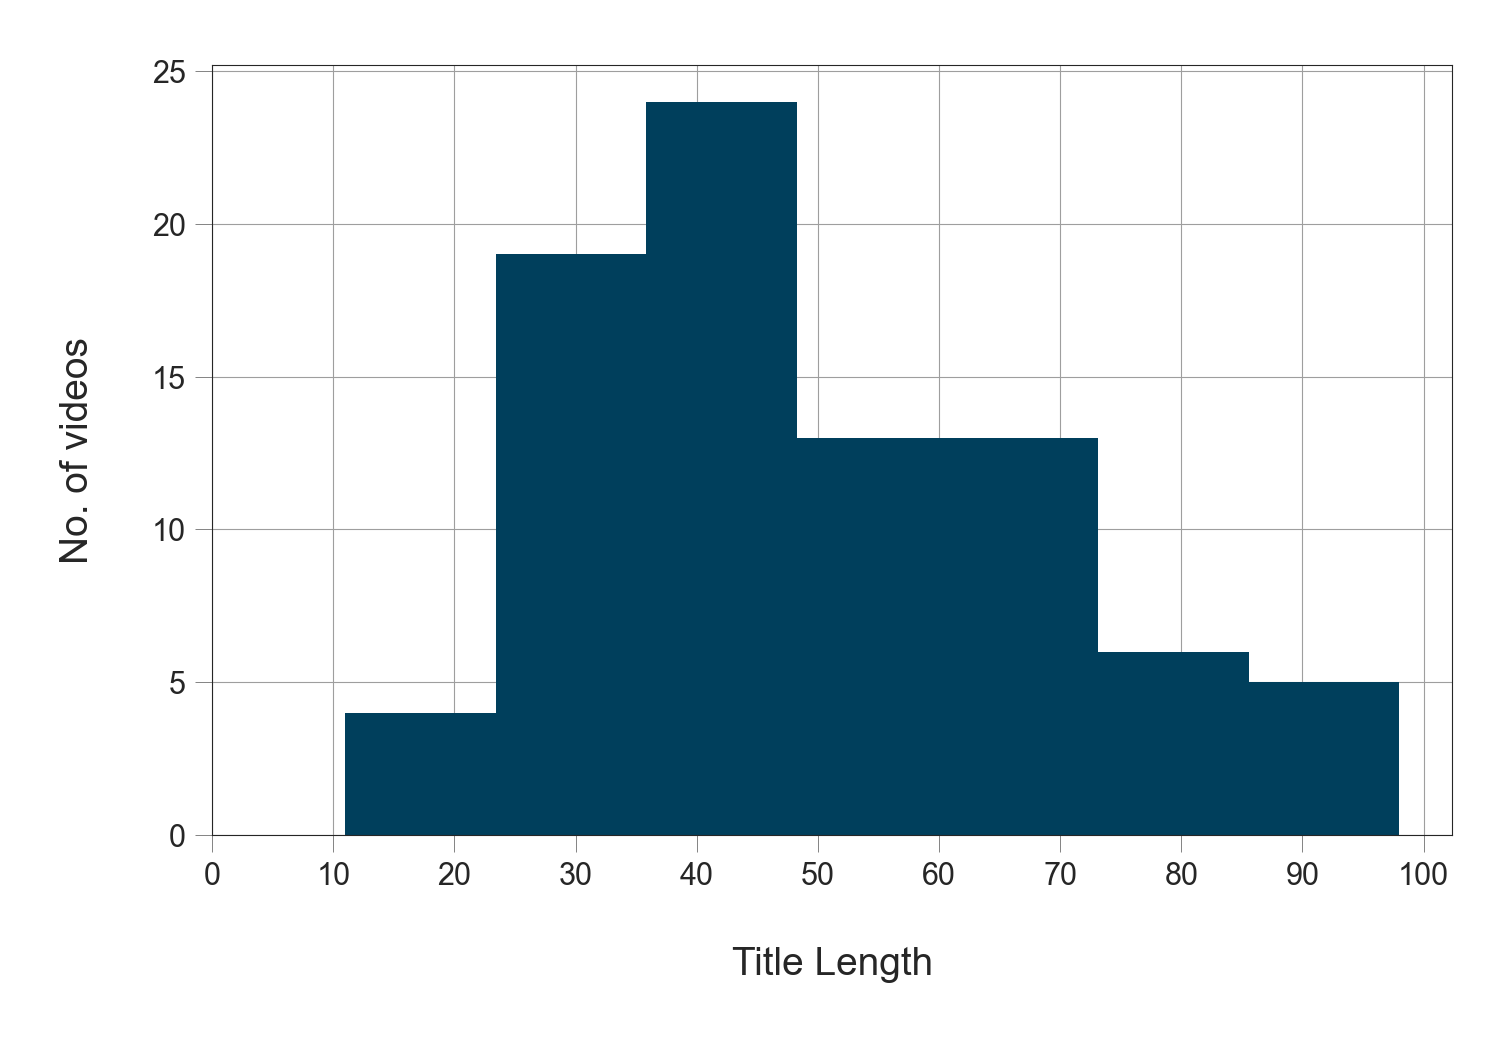

In [22]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

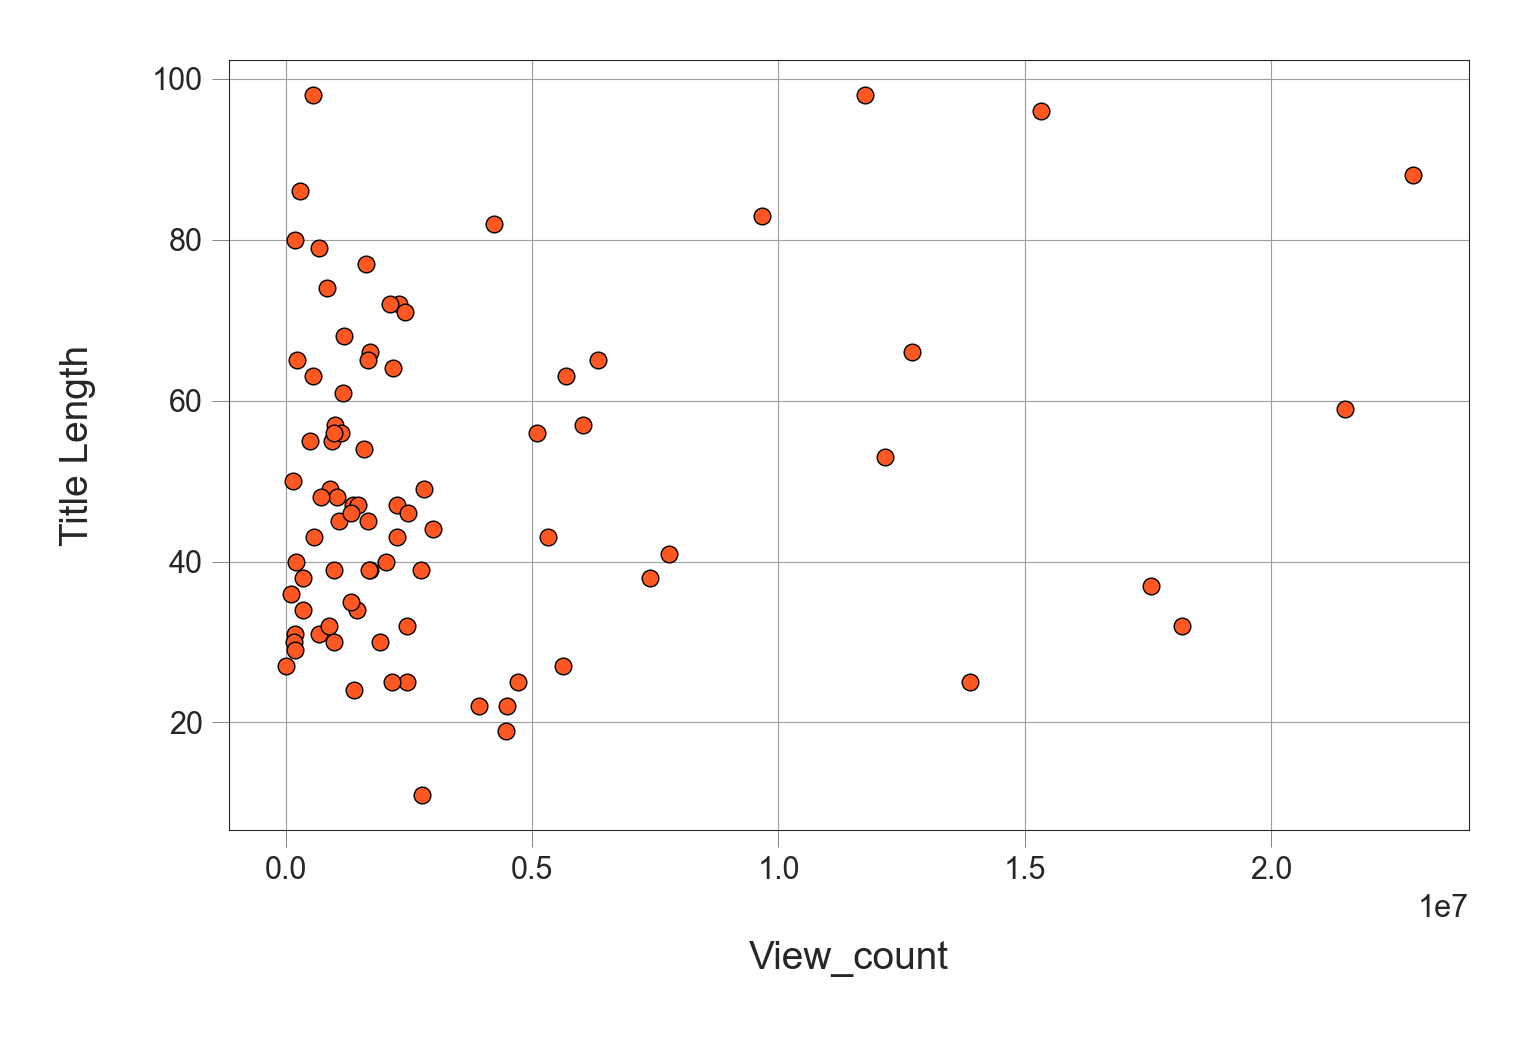

In [23]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="View_count", ylabel="Title Length")

In [24]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,contains_capitalized,title_length
categoryId,1.00,-0.32,-0.32,-0.23,-0.33,0.04,-0.21,-0.19,0.05
view_count,-0.32,1.00,0.90,0.77,0.83,-0.11,-0.08,0.07,0.18
likes,-0.32,0.90,1.00,0.73,0.90,-0.08,-0.06,-0.00,0.10
dislikes,-0.23,0.77,0.73,1.00,0.77,-0.05,-0.06,0.18,-0.03
comment_count,-0.33,0.83,0.90,0.77,1.00,-0.13,-0.07,0.06,0.07
comments_disabled,0.04,-0.11,-0.08,-0.05,-0.13,1.00,0.49,-0.07,-0.07
ratings_disabled,-0.21,-0.08,-0.06,-0.06,-0.07,0.49,1.00,-0.09,-0.13
contains_capitalized,-0.19,0.07,-0.00,0.18,0.06,-0.07,-0.09,1.00,0.03
title_length,0.05,0.18,0.10,-0.03,0.07,-0.07,-0.13,0.03,1.00


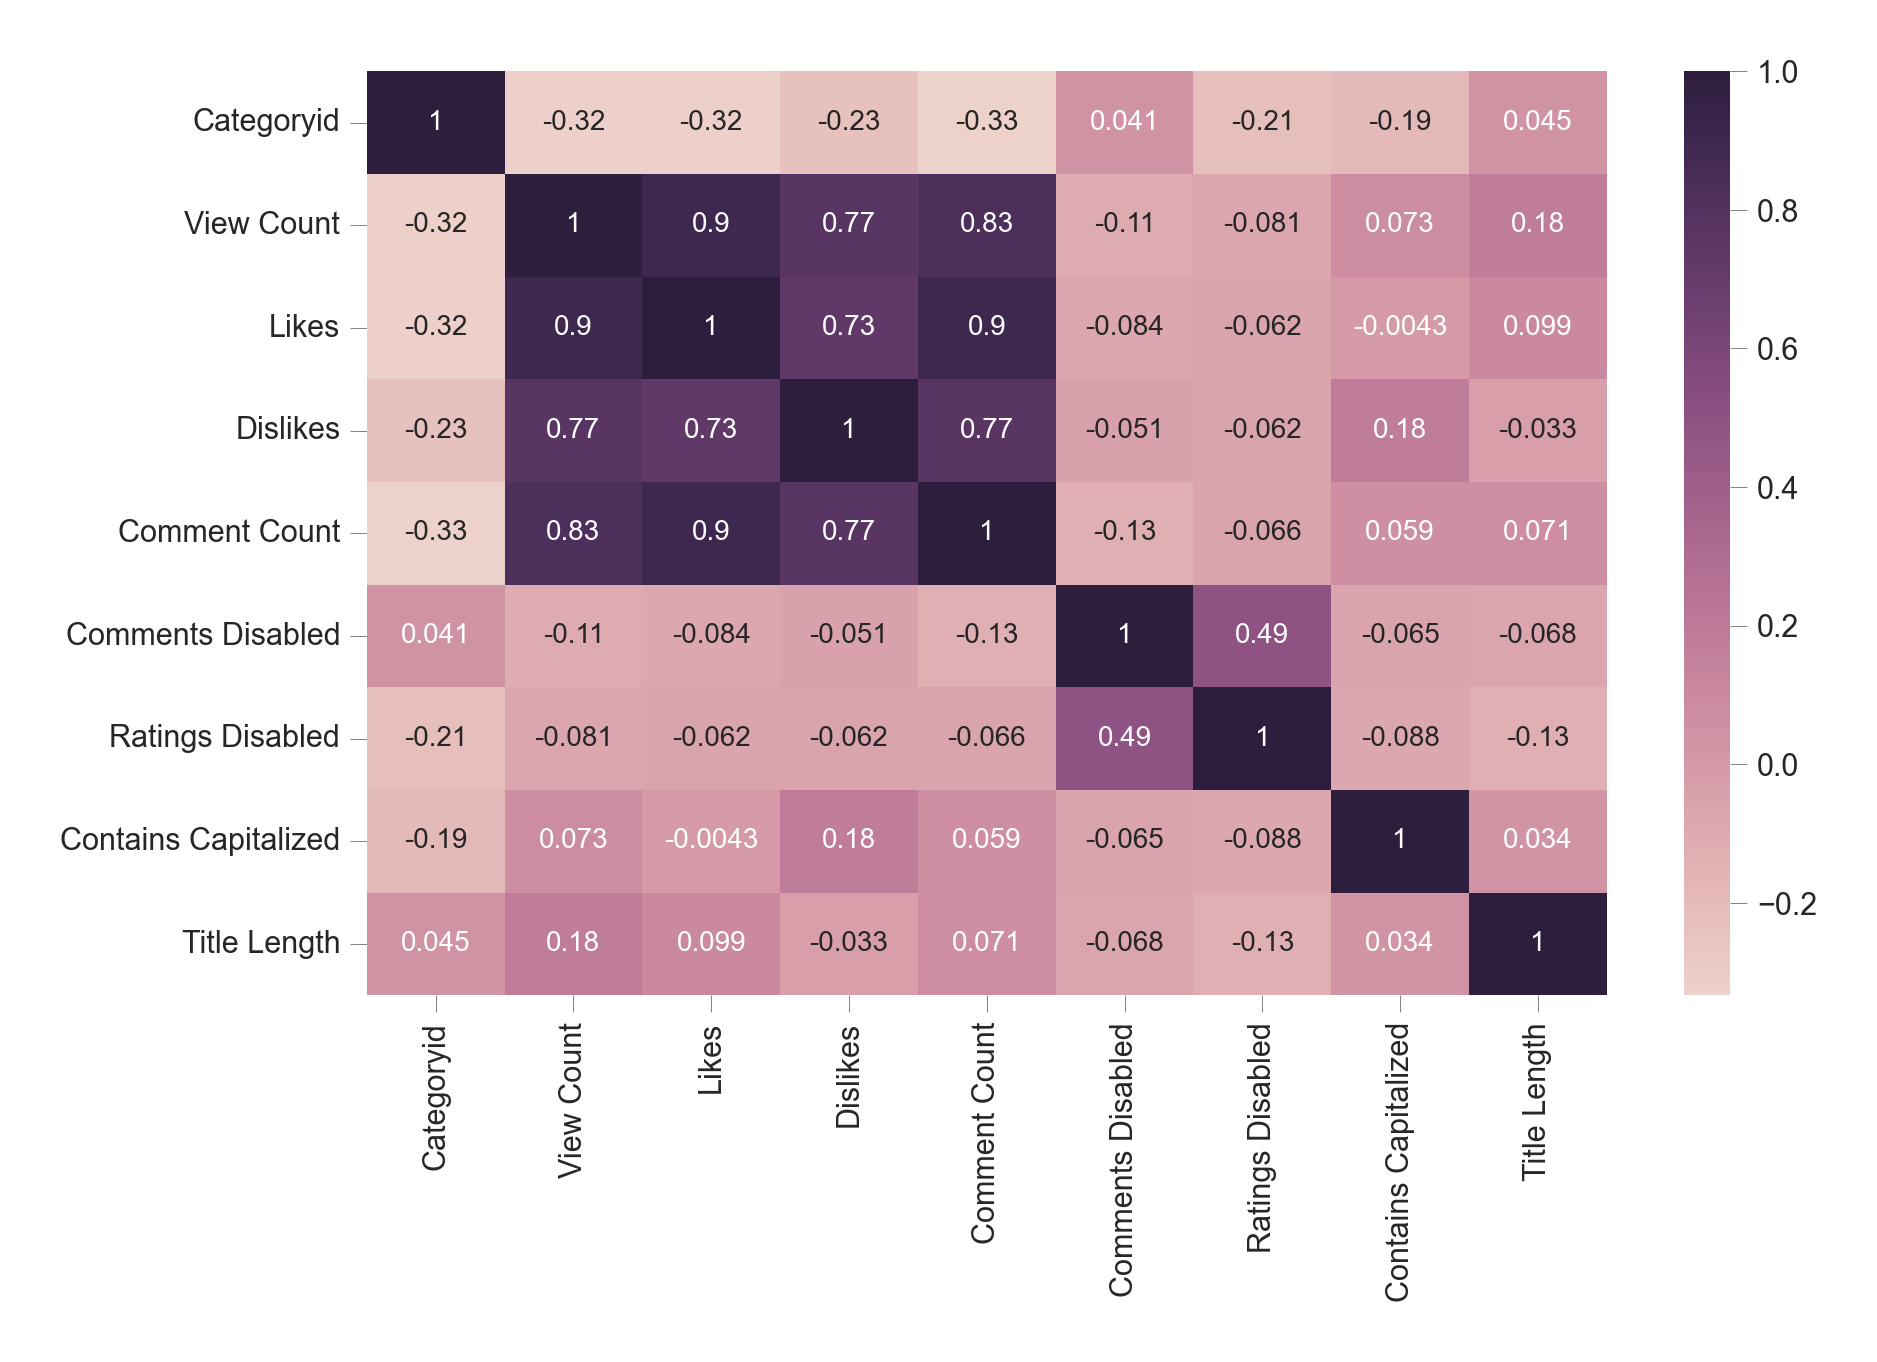

In [25]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]
my_df = df.select_dtypes(exclude=[object])
fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(my_df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

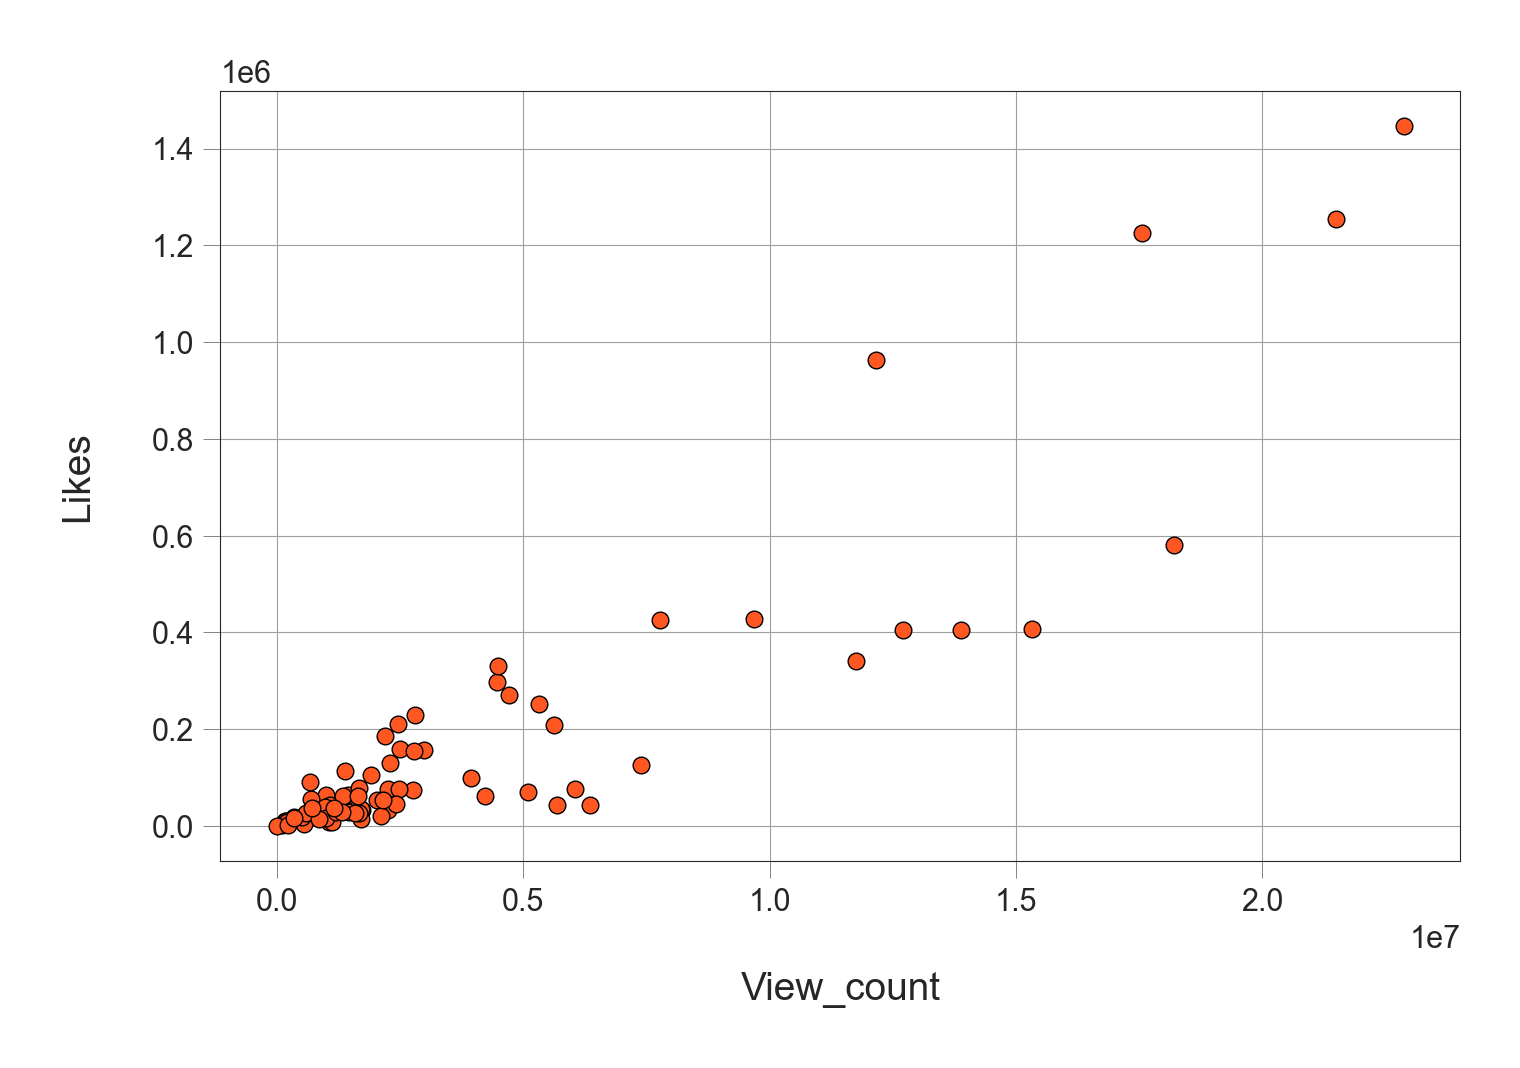

In [26]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="View_count", ylabel="Likes")

In [27]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 26),
 ('-', 21),
 ('the', 14),
 ('The', 13),
 ('(Official', 6),
 ('Halloween', 6),
 ('&', 6),
 ('THE', 6),
 ('of', 6),
 ('Me', 5),
 ('2018', 5),
 ('To', 5),
 ('Video)', 4),
 ('ft.', 4),
 ('by', 4),
 ('You', 4),
 ('to', 4),
 ('Nicki', 3),
 ('Minaj', 3),
 ('Test', 3),
 ('New', 3),
 ('in', 3),
 ('Music', 3),
 ('at', 3),
 ('Series', 3)]

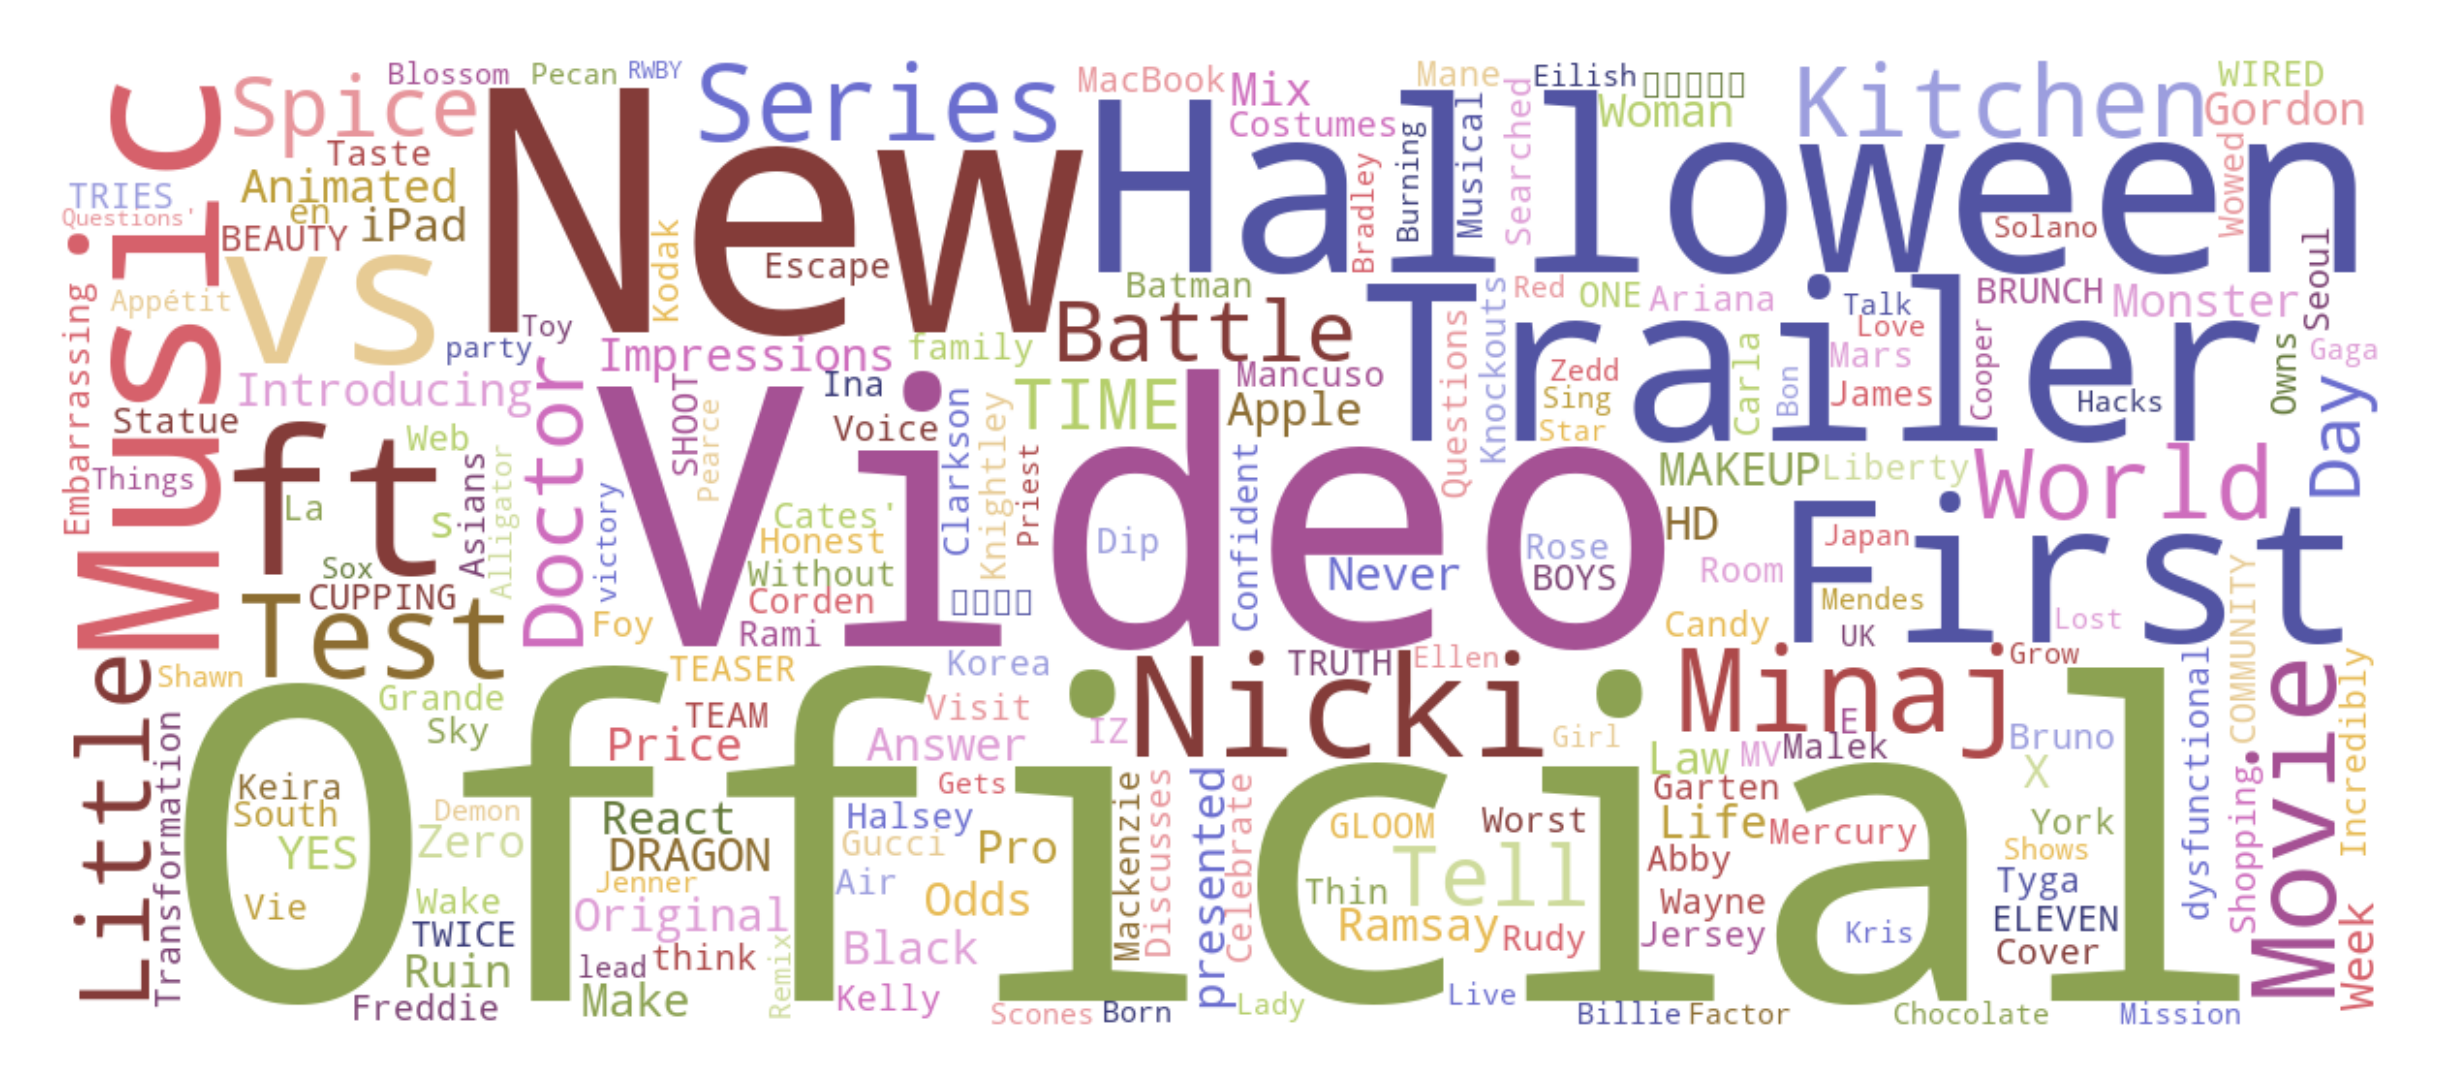

In [28]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

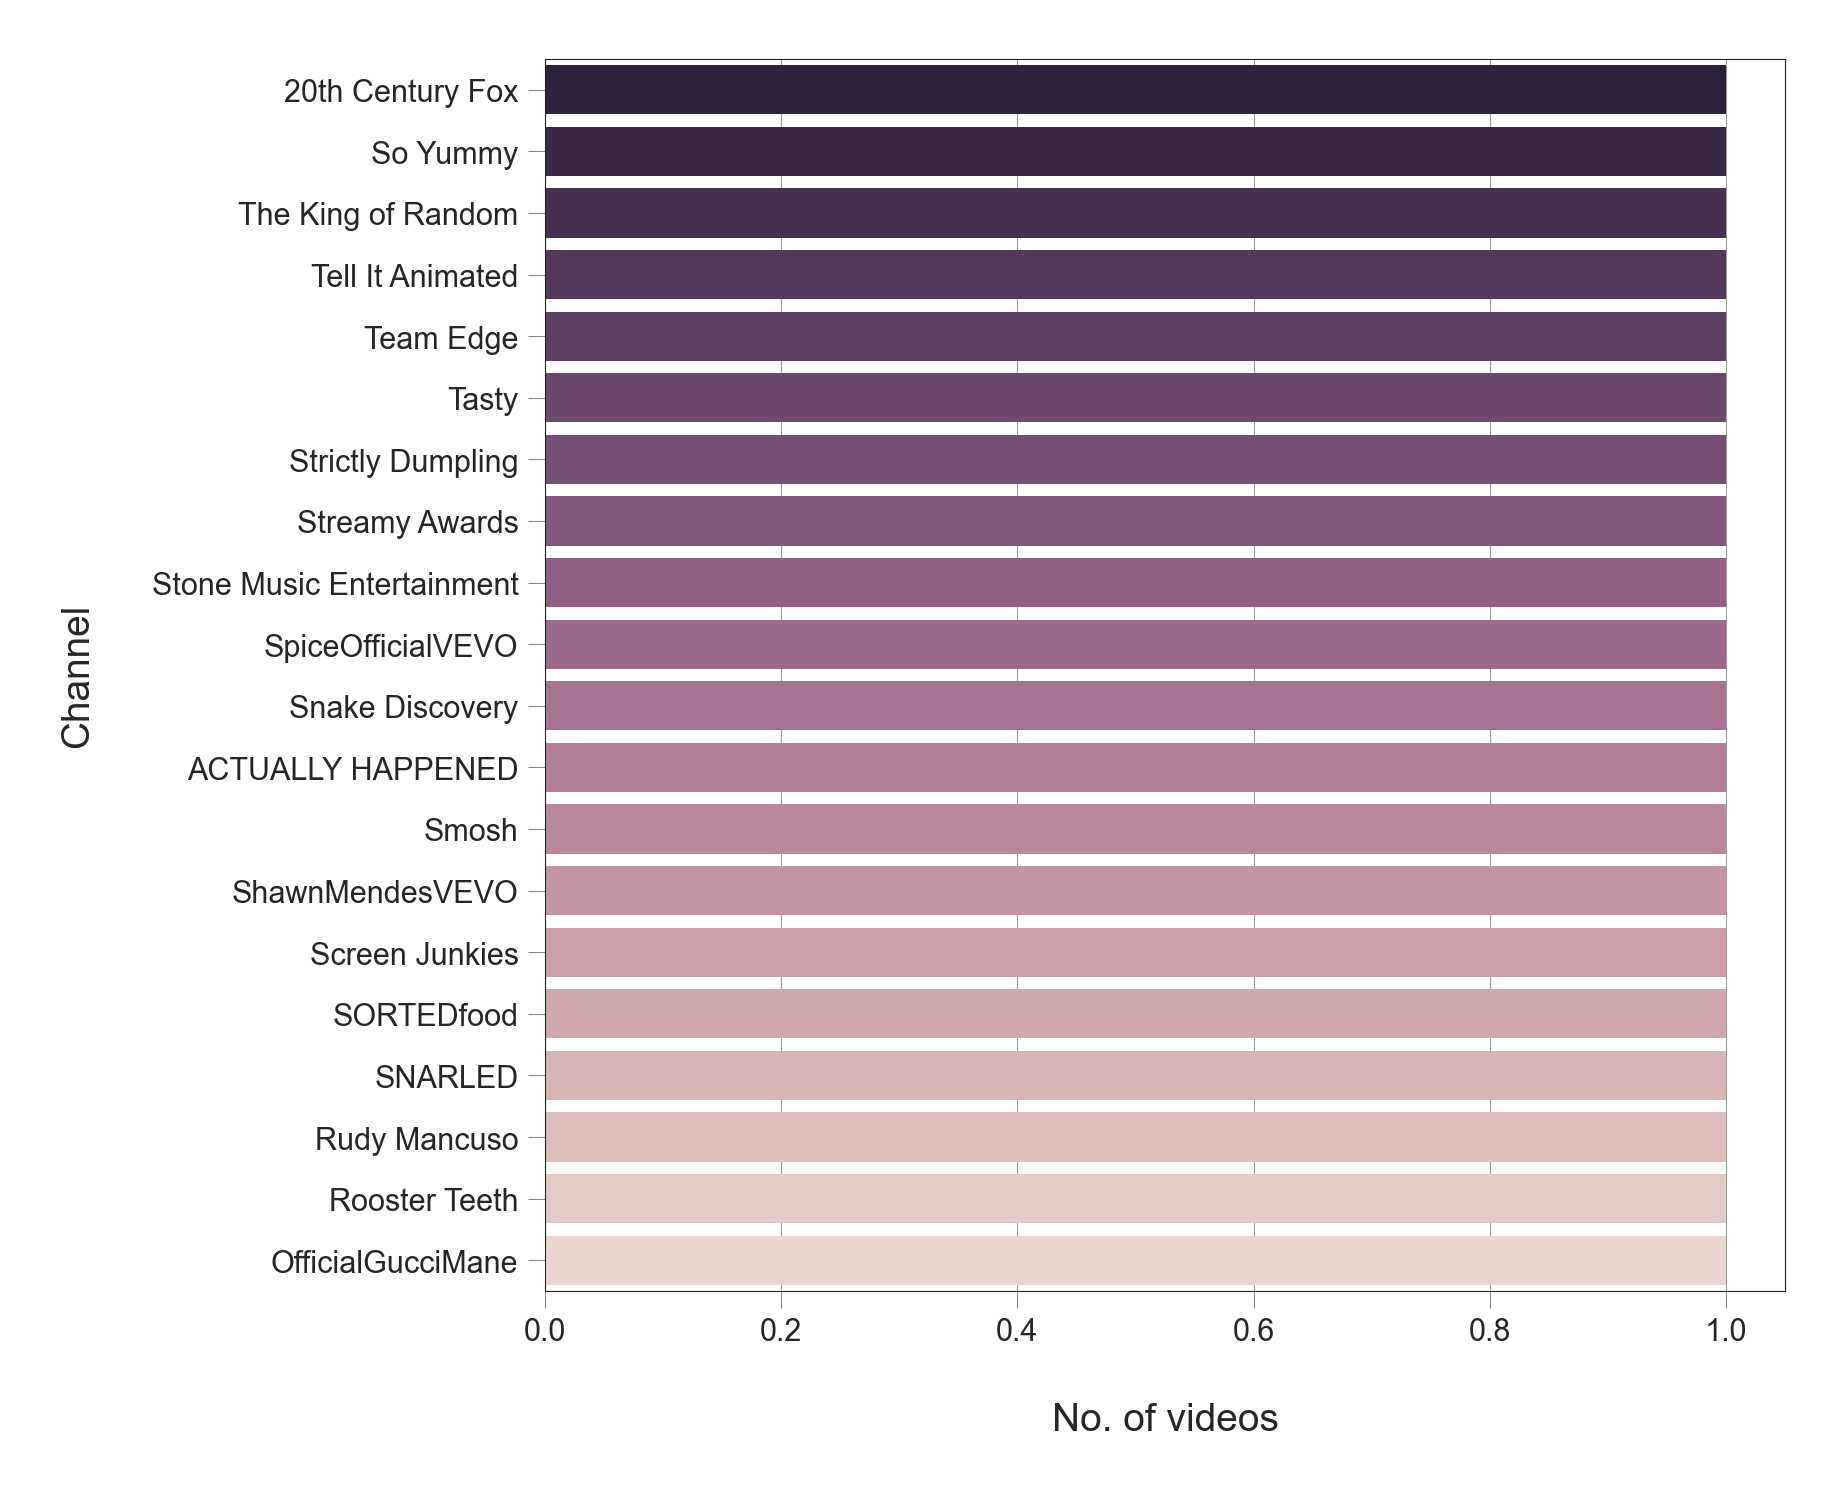

In [29]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")